In [9]:
#Documentos utilizados
# https://realpython.com/sentiment-analysis-python/
# https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [10]:
import numpy as np
import pandas as pd
import spacy

In [11]:
df_imdb = pd.read_csv('./IMDB Dataset.csv')

In [12]:
df_imdb.count()

review       50000
sentiment    50000
dtype: int64

In [13]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


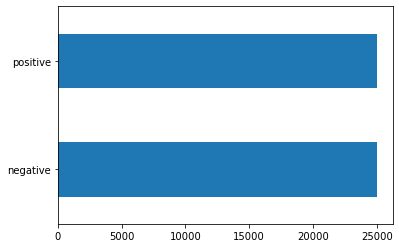

In [14]:
df_imdb.sentiment.value_counts().plot(kind = 'barh')

In [15]:
# Carrega o modelo spacy em ingles e portugues
# python -m spacy download en_core_web_sm
# python -m spacy download pt_core_news_sm

nlp = spacy.load("en_core_web_sm")

In [ ]:
vocab = [] 
total_words = 0    

for text in df_imdb['review']:
    
    #analisa texto
    doc = nlp(text)
    
    #exporta todos os tokens
    token_list = [token for token in doc]
    
    #exporta todos os tokens evitando stopwords
    filtered_tokens = [token for token in doc if not token.is_stop]
    
    #pega o lemma dos tokens
    lemmas = [ token.lemma_ for token in filtered_tokens ]
    
    #conta total words
    total_words = total_words + len(lemmas)
    
    for i in range(len(lemmas)):
        if lemmas[i] not in vocab: # to check if word is already in vocab
            vocab.append(lemmas[i])

In [ ]:
total_words

In [ ]:
vocab

In [ ]:
#AQUI O CODIGO ESTA REPETIDO, A PARTE CENTRAL
#DA PRA REFATORAR

bow_vec = []      # list to store bag of words vectors

for i in range(len(df_imdb['review'])):
   
    #cria novo vetor
    doc_vec = []
    
    #analisa texto
    doc = nlp(text)
    
    #exporta todos os tokens
    token_list = [token for token in doc]
    
    #exporta todos os tokens evitando stopwords
    filtered_tokens = [token for token in doc if not token.is_stop]
    
    #pega o lemma dos tokens
    lemmas = [ token.lemma_ for token in filtered_tokens ]
    
    #conta total words
    total_words = total_words + len(lemmas)
    
    for j in range(len(vocab)): # iterate over vocab 
        if vocab[j] in lemmas: 
            doc_vec.append(doc.count(vocab[j])) # append freq if present
        else:
            doc_vec.append(0) # else append zero
            
    bow_vec.append(doc_vec)
    

In [ ]:
df_bag = pd.DataFrame(bow_vec, columns = vocab)
df_bag 